In [2]:
import hashlib
import numpy as np
from matplotlib import pyplot as plt

def report(arg_x):

    np.random.seed(
        int(hashlib.sha1("송서하".encode("utf8"))
            .hexdigest()[:5],
            16)
    )
    plt.figure(figsize=(15,6))
    beta= 11.1
    gamma = 1/11.1
    alpha = 5e-3
    S_prior = np.diag([alpha**-1]*10)

    x_line = np.arange(-1, 1.01, 0.01)
    y_true = np.array([np.sin(2*np.pi*i) for i in x_line])
    plt.plot(x_line, y_true, c="red")

    x = np.random.uniform(-1, 1, 100)
    e = np.random.normal(0, gamma, len(x))
    y = np.array([np.sin(2*np.pi*x_) for x_ in x])+e
    plt.scatter(x, y)

    P = np.array([[x_**i for i in range(10)]
                  for x_ in x])

    m_MLE = np.linalg.inv(P.T.dot(P)).dot(P.T).dot(y)
    y_pred_MLE = [sum(m_MLE[i]*x_**i for i in range(10)) for x_ in x_line]
    plt.plot(x_line, y_pred_MLE, c="green")

    S_MAP = np.linalg.inv(np.linalg.inv(S_prior)+
                          beta*P.T.dot(P))
    m_MAP = beta*S_MAP.dot(P.T).dot(y)
    y_pred_MAP = [sum(m_MAP[i]*x_**i for i in range(10)) for x_ in x_line]
    plt.plot(x_line, y_pred_MAP, c="yellow")

    P_line = np.array([[x_**i for i in range(10)] for x_ in x_line])
    sigmas = np.array([gamma+P_.dot(S_MAP).dot(P_.T) for P_ in P_line])**(1/2)
    plt.plot(x_line, y_pred_MAP-sigmas, "--", c="yellow")
    plt.plot(x_line, y_pred_MAP+sigmas, "--", c="yellow")

    result_MLE = sum(m_MLE[i]*arg_x**i for i in range(10))
    result_MAP = sum(m_MAP[i]*arg_x**i for i in range(10))
    statement = "input x: {} | MLE-output y: {} | MAP-output y: {}".format(
        arg_x, round(result_MLE, 3), round(result_MAP, 3)
    )
    plt.plot([arg_x]*300, np.arange(-1.5, 1.5, 0.01), c="black")
    plt.title(statement, fontsize=20)
    plt.legend(["true dist",
                "MLE approximation",
                "MAP approximation",
                "+1 sigma",
                "- 1 sigma",
                "argument x",
                "data point"])
    plt.show()

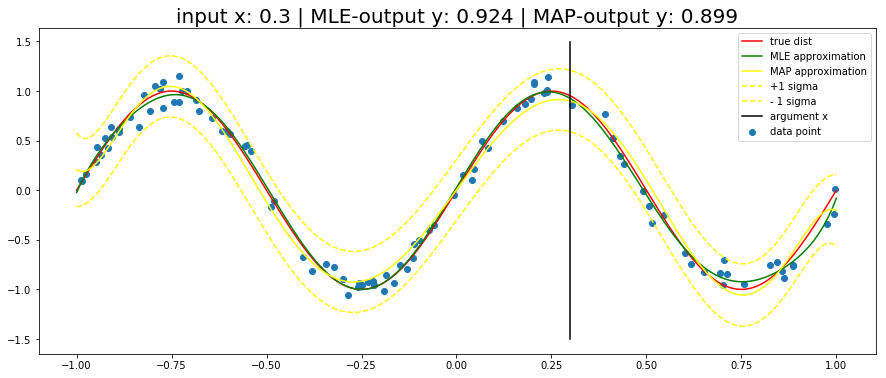

In [3]:
report(0.3)